In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/home/surbhit/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
data = pd.read_csv('data/StudentPerformance.csv')

In [4]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
data.shape

(1000, 8)

## Dataset Information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B, C, D, E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- maths score
- reading score
- writing score

In [6]:
data.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
#Unique values
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
num_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_feature = [feature for feature in data.columns if data[feature].dtype == 'O']

print('Number of numerical features: {}'.format(len(num_features)))
print('Number of categorical features: {}'.format(len(categorical_feature)))

Number of numerical features: 3
Number of categorical features: 5


In [10]:
for cf in categorical_feature:
    print('Unique values for {}: {}'.format(cf, data[cf].nunique()))
    print(data[cf].unique())
    print()

Unique values for gender: 2
['female' 'male']

Unique values for race_ethnicity: 5
['group B' 'group C' 'group A' 'group D' 'group E']

Unique values for parental_level_of_education: 6
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Unique values for lunch: 2
['standard' 'free/reduced']

Unique values for test_preparation_course: 2
['none' 'completed']



In [11]:
#Total Score
data['total_score'] = data['math_score']+data['reading_score']+data['writing_score']
data['average_score'] = round(data['total_score']/3,2)

data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [12]:
reading_full = len(data[data['reading_score'] == 100])
writing_full = len(data[data['writing_score'] == 100])
math_full = len(data[data['math_score'] == 100])

print('Number of students with full marks in Maths: {}'.format(math_full))
print('Number of students with full marks in Writing: {}'.format(writing_full))
print('Number of students with full marks in Reading: {}'.format(reading_full))

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [13]:
reading_less_than_20 = len(data[data['reading_score'] <= 20])
writing_less_than_20 = len(data[data['writing_score'] <= 20])
math_less_than_20 = len(data[data['math_score'] <= 20])

print('Number of students with less than 20 marks in Maths: {}'.format(math_less_than_20))
print('Number of students with less than 20 marks in Writing: {}'.format(writing_less_than_20))
print('Number of students with less than 20 marks in Reading: {}'.format(reading_less_than_20))

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


In [14]:
reading_more_than_75 = len(data[data['reading_score'] >= 75])
writing_more_than_75 = len(data[data['writing_score'] >= 75])
math_more_than_75 = len(data[data['math_score'] >= 75])

print('Number of students with more than 75 marks in Maths: {}'.format(math_more_than_75))
print('Number of students with more than 75 marks in Writing: {}'.format(writing_more_than_75))
print('Number of students with more than 75 marks in Reading: {}'.format(reading_more_than_75))

Number of students with more than 75 marks in Maths: 295
Number of students with more than 75 marks in Writing: 350
Number of students with more than 75 marks in Reading: 370


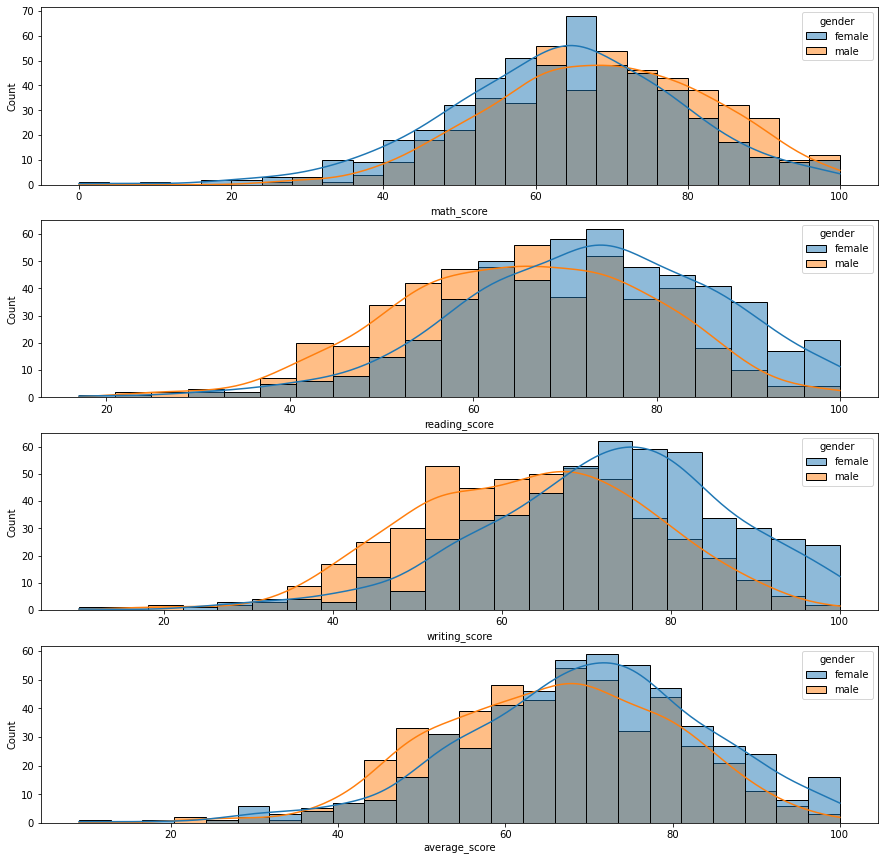

In [15]:
fig, axs = plt.subplots(4, 1, figsize=(15, 15))
plt.subplot(411)
sns.histplot(data=data,x='math_score',kde=True,hue='gender')
plt.subplot(412)
sns.histplot(data=data,x='reading_score',kde=True,hue='gender')
plt.subplot(413)
sns.histplot(data=data,x='writing_score',kde=True,hue='gender')
plt.subplot(414)
sns.histplot(data=data,x='average_score',kde=True,hue='gender')
plt.show()

**INFERENCE**
- Maths score - More females with scores within 72. More males with score beyond 72

- Reading score - More males with scores within 66. More females with score beyond 66

- Writing score - More males with scores within 69. More females with score beyond 69

- Average score - More males with scores within 66. More females with score beyond 66

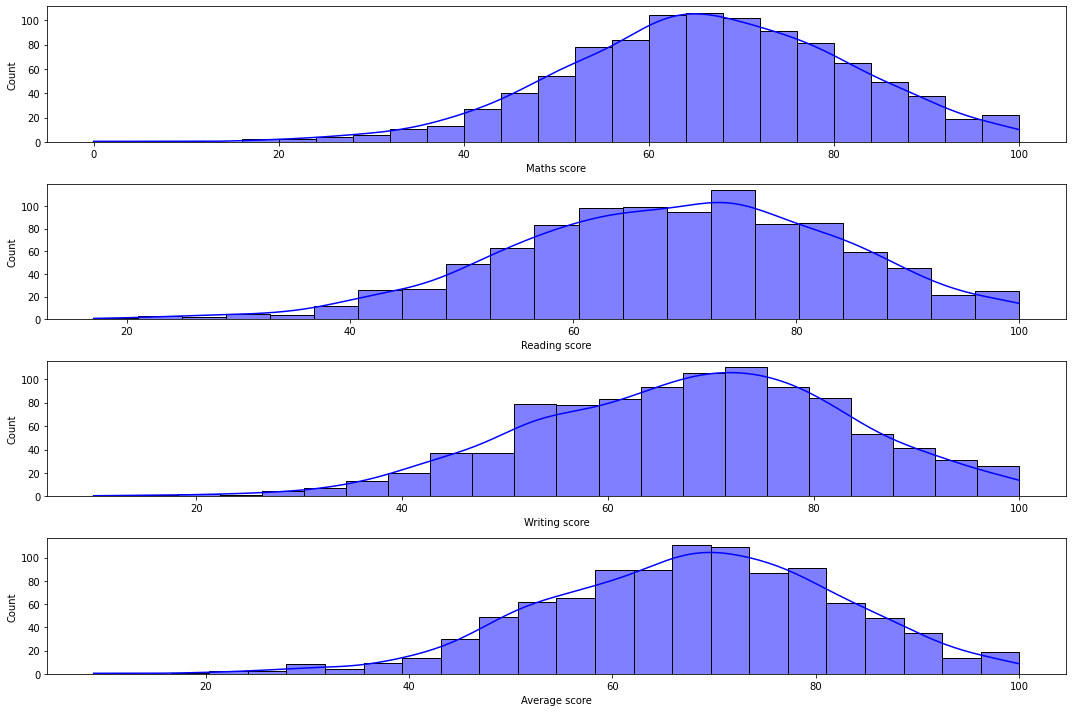

In [16]:
fig, axs = plt.subplots(4, 1, figsize=(15, 10))
plt.subplot(411)
sns.histplot(data=data,x='math_score',kde=True,color='b')
plt.xlabel('Maths score')
plt.subplot(412)
sns.histplot(data=data,x='reading_score',kde=True,color='b')
plt.xlabel('Reading score')
plt.subplot(413)
sns.histplot(data=data,x='writing_score',kde=True,color='b')
plt.xlabel('Writing score')
plt.subplot(414)
sns.histplot(data=data,x='average_score',kde=True,color='b')
plt.xlabel('Average score')
plt.tight_layout()
plt.show()

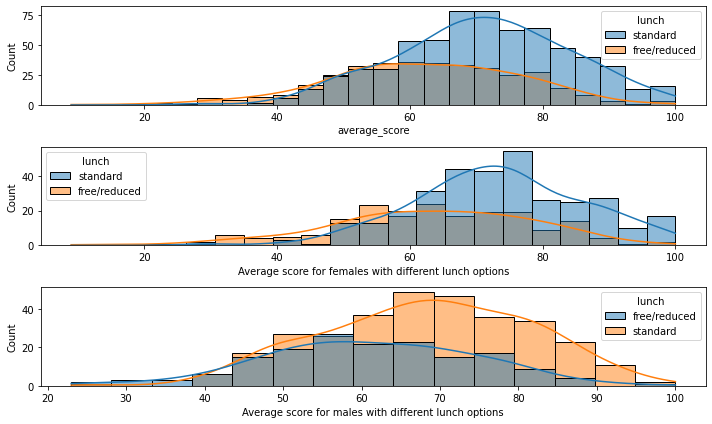

In [17]:
#Average marks with lunch

plt.subplots(3,1,figsize=(10,6))
#Average marks with hue as lunch
plt.subplot(311)
sns.histplot(data=data,x='average_score',kde=True,hue='lunch')

#Average marks for females with hue as lunch
plt.subplot(312)
sns.histplot(data=data[data.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.xlabel('Average score for females with different lunch options')
#Average marks for males with hue as lunch
plt.subplot(313)
sns.histplot(data=data[data.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.xlabel('Average score for males with different lunch options')

plt.tight_layout()
plt.show()

**INFERENCE**
- Students with standard lunch have higher average scores

<AxesSubplot:xlabel='parental_level_of_education'>

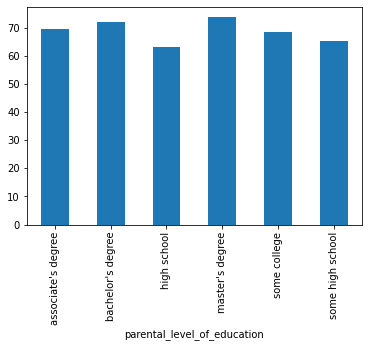

In [18]:
#Average marks with parental education level

data.groupby('parental_level_of_education')['average_score'].mean().plot.bar()

<AxesSubplot:xlabel='parental_level_of_education'>

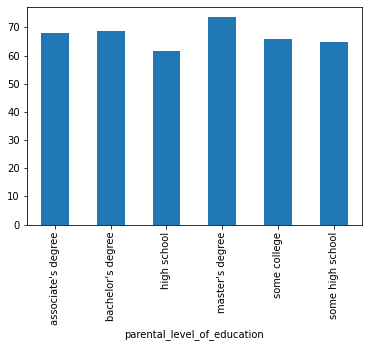

In [19]:
data[data['gender']=='male'].groupby('parental_level_of_education')['average_score'].mean().plot.bar()

<AxesSubplot:xlabel='parental_level_of_education'>

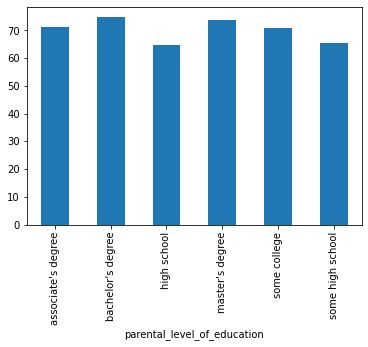

In [20]:
data[data['gender']=='female'].groupby('parental_level_of_education')['average_score'].mean().plot.bar()

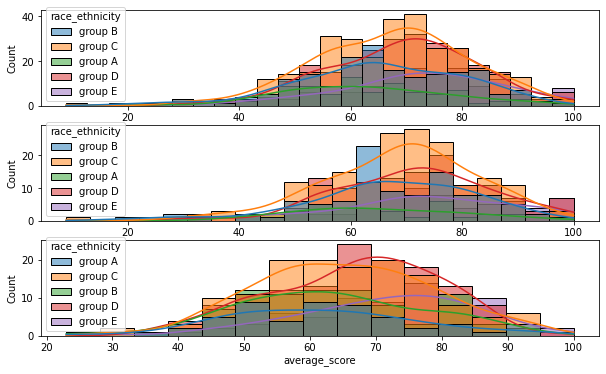

In [21]:
plt.subplots(3,1,figsize=(10,6))
plt.subplot(311)
ax =sns.histplot(data=data,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(312)
ax =sns.histplot(data=data[data.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(313)
ax =sns.histplot(data=data[data.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

**INFERENCE**
- Group A and Group B students have low average scores overall
- Group C students generally perform better than other students

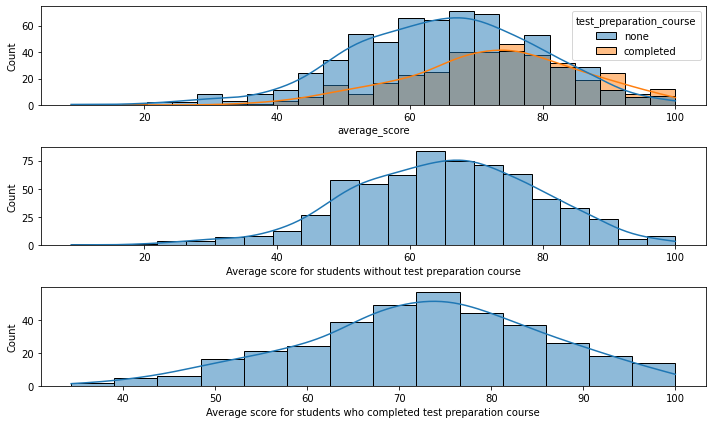

In [22]:
#Average marks with test preparation course

plt.subplots(3,1,figsize=(10,6))
#Average marks with hue as lunch
plt.subplot(311)
sns.histplot(data=data,x='average_score',kde=True,hue='test_preparation_course')

#Average marks for students with no test preparation course
plt.subplot(312)
sns.histplot(data=data[data.test_preparation_course=='none'],x='average_score',kde=True)
plt.xlabel('Average score for students without test preparation course')

#Average marks for students who completed test preparation course
plt.subplot(313)
sns.histplot(data=data[data.test_preparation_course=='completed'],x='average_score',kde=True)
plt.xlabel('Average score for students who completed test preparation course')

plt.tight_layout()
plt.show()

**INFERENCE**
- There are more students without test preparation course
- Students who have completed the test preparation course have higher average marks